# 為替レートと株価の相関

In [55]:
import datetime as dt
import japanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import mplfinance as mpf
import os
import pandas as pd
import yfinance as yf
import wget

In [17]:
start = '2024-06-01'
end = '2024-08-09'
ticker_exchange = yf.Ticker('USDJPY=X')

In [18]:
df_day = ticker_exchange.history(start=start, end=end, interval='1d')
df_day.index = df_day.index.tz_convert('Asia/Tokyo')
df_day

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-03 08:00:00+09:00,157.179993,157.451004,155.970993,157.179993,0,0.0,0.0
2024-06-04 08:00:00+09:00,156.076004,156.479004,154.600998,156.076004,0,0.0,0.0
2024-06-05 08:00:00+09:00,155.123993,156.473007,155.110992,155.123993,0,0.0,0.0
2024-06-06 08:00:00+09:00,155.929001,156.395996,155.406998,155.929001,0,0.0,0.0
2024-06-07 08:00:00+09:00,155.697006,157.067001,155.141998,155.697006,0,0.0,0.0
2024-06-10 08:00:00+09:00,156.832993,157.186005,156.723007,156.832993,0,0.0,0.0
2024-06-11 08:00:00+09:00,157.039993,157.388000,156.811005,157.039993,0,0.0,0.0
2024-06-12 08:00:00+09:00,157.104996,157.365005,155.729004,157.104996,0,0.0,0.0
2024-06-13 08:00:00+09:00,156.800003,157.300003,156.576996,156.800003,0,0.0,0.0


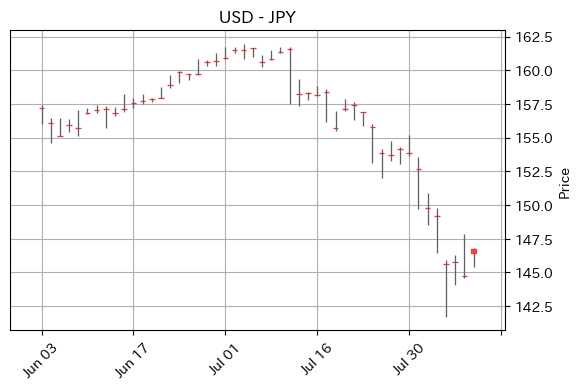

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))

mpf.plot(df_day, type='candle', style='yahoo', ax=ax)
ax.set_title('USD - JPY')

fig.subplots_adjust(left=0.05, right=0.875, bottom=0.15, top=0.9)
plt.grid()
plt.savefig('report_20240808_exchange_1.png')
plt.show()

In [68]:
df_hour = ticker_exchange.history(start=start, end=end, interval='1h')[['Open', 'High', 'Low', 'Close']]
df_hour.index = df_hour.index.tz_convert('Asia/Tokyo')
df_hour

,Open,High,Low,Close
Datetime,,,,
2024-06-03 08:00:00+09:00,157.285995,157.300003,157.123993,157.179001
2024-06-03 09:00:00+09:00,157.182007,157.309006,157.042999,157.085007
2024-06-03 10:00:00+09:00,157.087006,157.149002,156.990005,157.057999
2024-06-03 11:00:00+09:00,157.057999,157.253006,157.050003,157.235001
2024-06-03 12:00:00+09:00,157.235001,157.475006,157.201996,157.421005
...,...,...,...,...
2024-08-08 07:00:00+09:00,146.695999,146.783997,146.339996,146.539993
2024-08-08 08:00:00+09:00,146.520004,146.535004,145.563995,146.276001
2024-08-08 09:00:00+09:00,146.283997,146.539001,145.414993,146.001999


終値を使うため、日本時間で午後３時のデータのみ抽出

In [69]:
list_day = sorted(list(set(['%d-%02d-%02d 15:00:00+09:00' % (ts.year, ts.month, ts.day) for ts in df.index])))
list_series = list()
for ts in list_day:
    try:
        series = df_hour.loc[ts]
        list_series.append(series)
    except KeyError:
        print('no key of \'%s\'' % ts)
df_exchange_jp = pd.concat(list_series, axis=1).T
print(df_exchange_jp)
print(df_exchange_jp.shape)

no key of '2024-06-08 15:00:00+09:00'
no key of '2024-06-15 15:00:00+09:00'
no key of '2024-06-22 15:00:00+09:00'
no key of '2024-06-29 15:00:00+09:00'
no key of '2024-07-06 15:00:00+09:00'
no key of '2024-07-13 15:00:00+09:00'
no key of '2024-07-20 15:00:00+09:00'
no key of '2024-07-27 15:00:00+09:00'
no key of '2024-08-03 15:00:00+09:00'
no key of '2024-08-08 15:00:00+09:00'
                                 Open        High         Low       Close
2024-06-03 15:00:00+09:00  157.406998  157.412994  157.235992  157.253998
2024-06-04 15:00:00+09:00  156.194000  156.207001  155.796005  155.951996
2024-06-05 15:00:00+09:00  155.643005  155.921997  155.600006  155.893997
2024-06-06 15:00:00+09:00  155.899994  156.181000  155.807999  156.063995
2024-06-07 15:00:00+09:00  155.507996  155.535004  155.128998  155.358994
2024-06-10 15:00:00+09:00  157.067993  157.182007  157.003006  157.102997
2024-06-11 15:00:00+09:00  157.279999  157.326996  157.205002  157.278000
2024-06-12 15:00:00+09:00  1

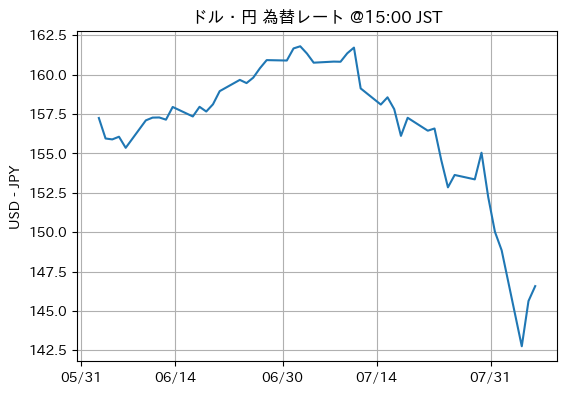

In [73]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df_exchange_jp.index, df_exchange_jp['Close'])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax.set_title('ドル・円 為替レート @15:00 JST')
ax.set_ylabel('USD - JPY')
ax.grid()

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.075, top=0.9)
plt.savefig('report_20240808_exchange_2.png')
plt.show()